# @mahendra cars dataset seaborn 

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,10))
sns.set(rc={'figure.figsize':(10,10)})
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [50]:
df=pd.read_csv('auto-mpg.csv')
df.head()
df.shape
df.isnull().any()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

(398, 9)

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [51]:
df.describe()

mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

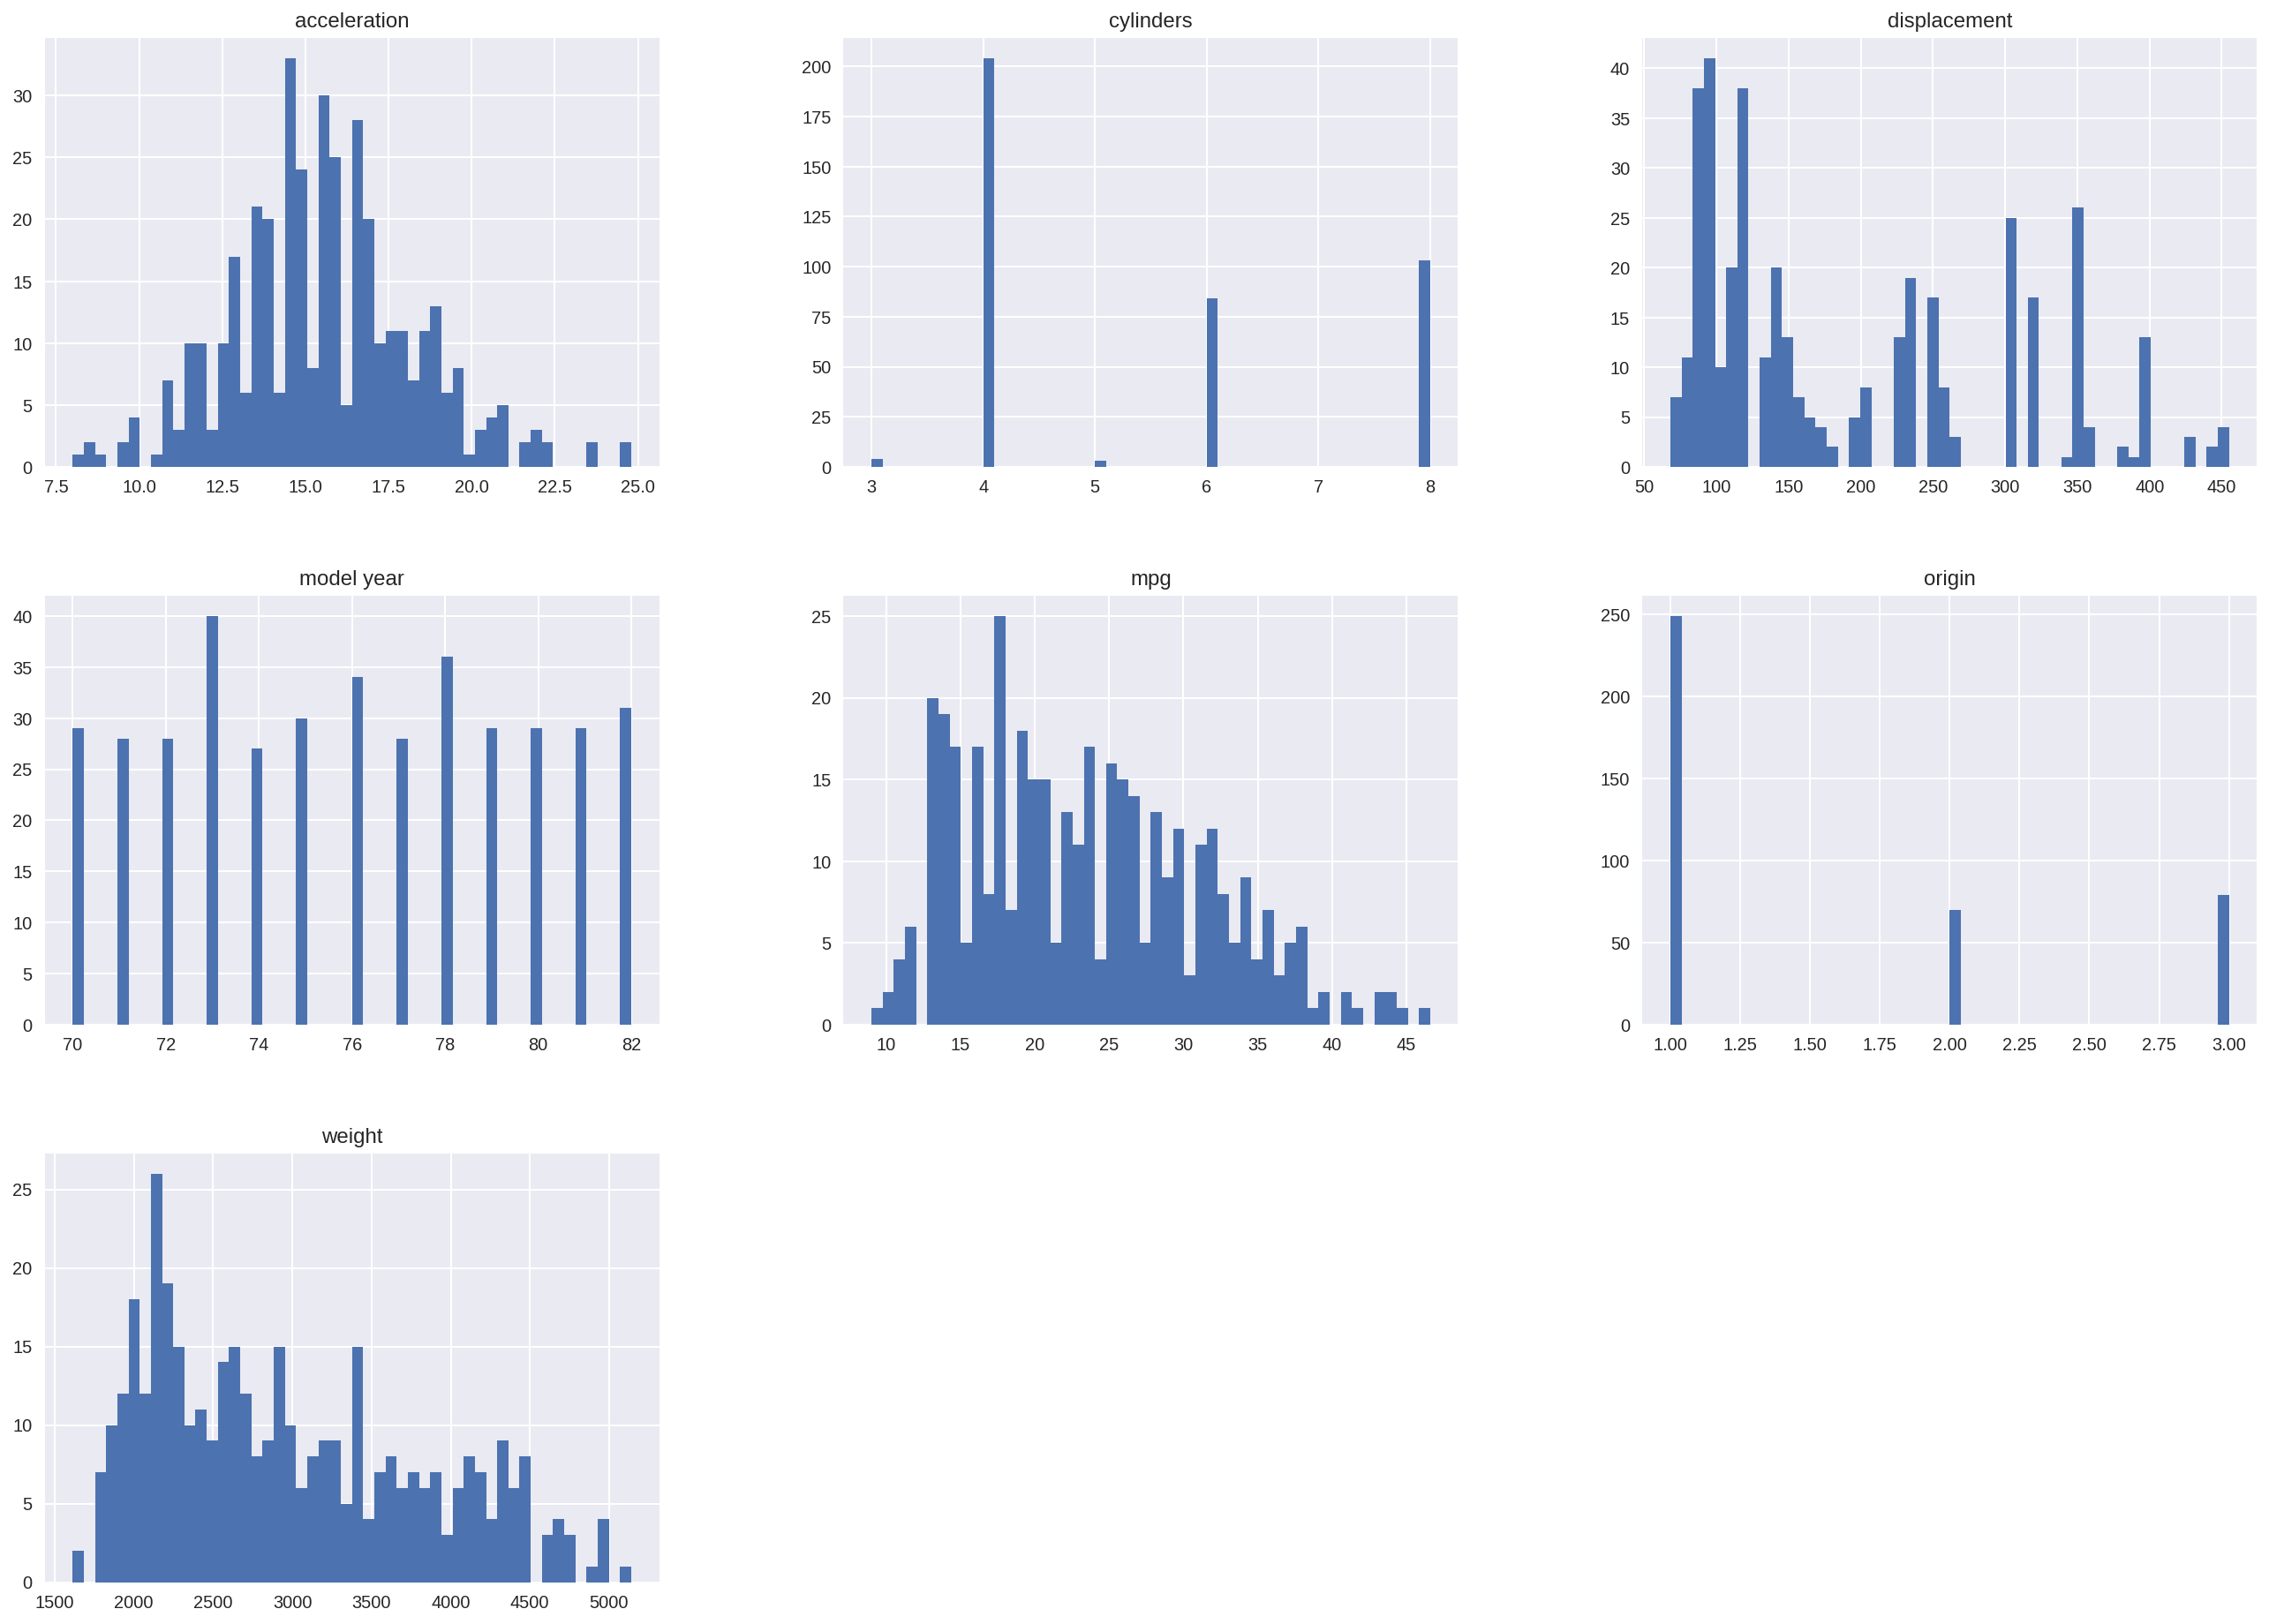

In [52]:
x=df.hist(bins=50, figsize=(20, 15))

## factorplot

In [53]:
sns.factorplot?

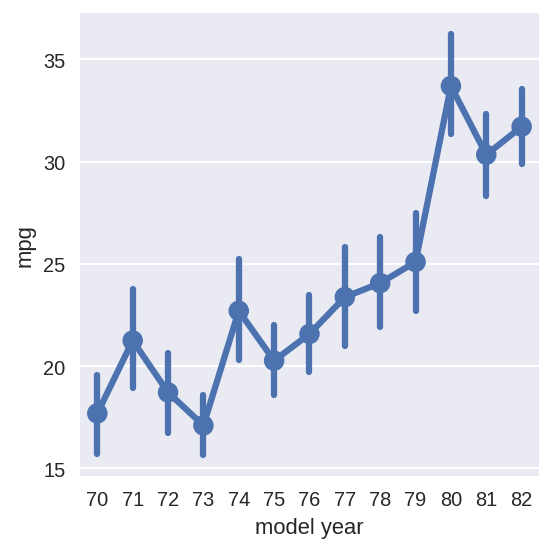

In [82]:
current_palette = sns.color_palette()
a=sns.factorplot(data=df, x="model year", y="mpg")#,palette=current_palette)

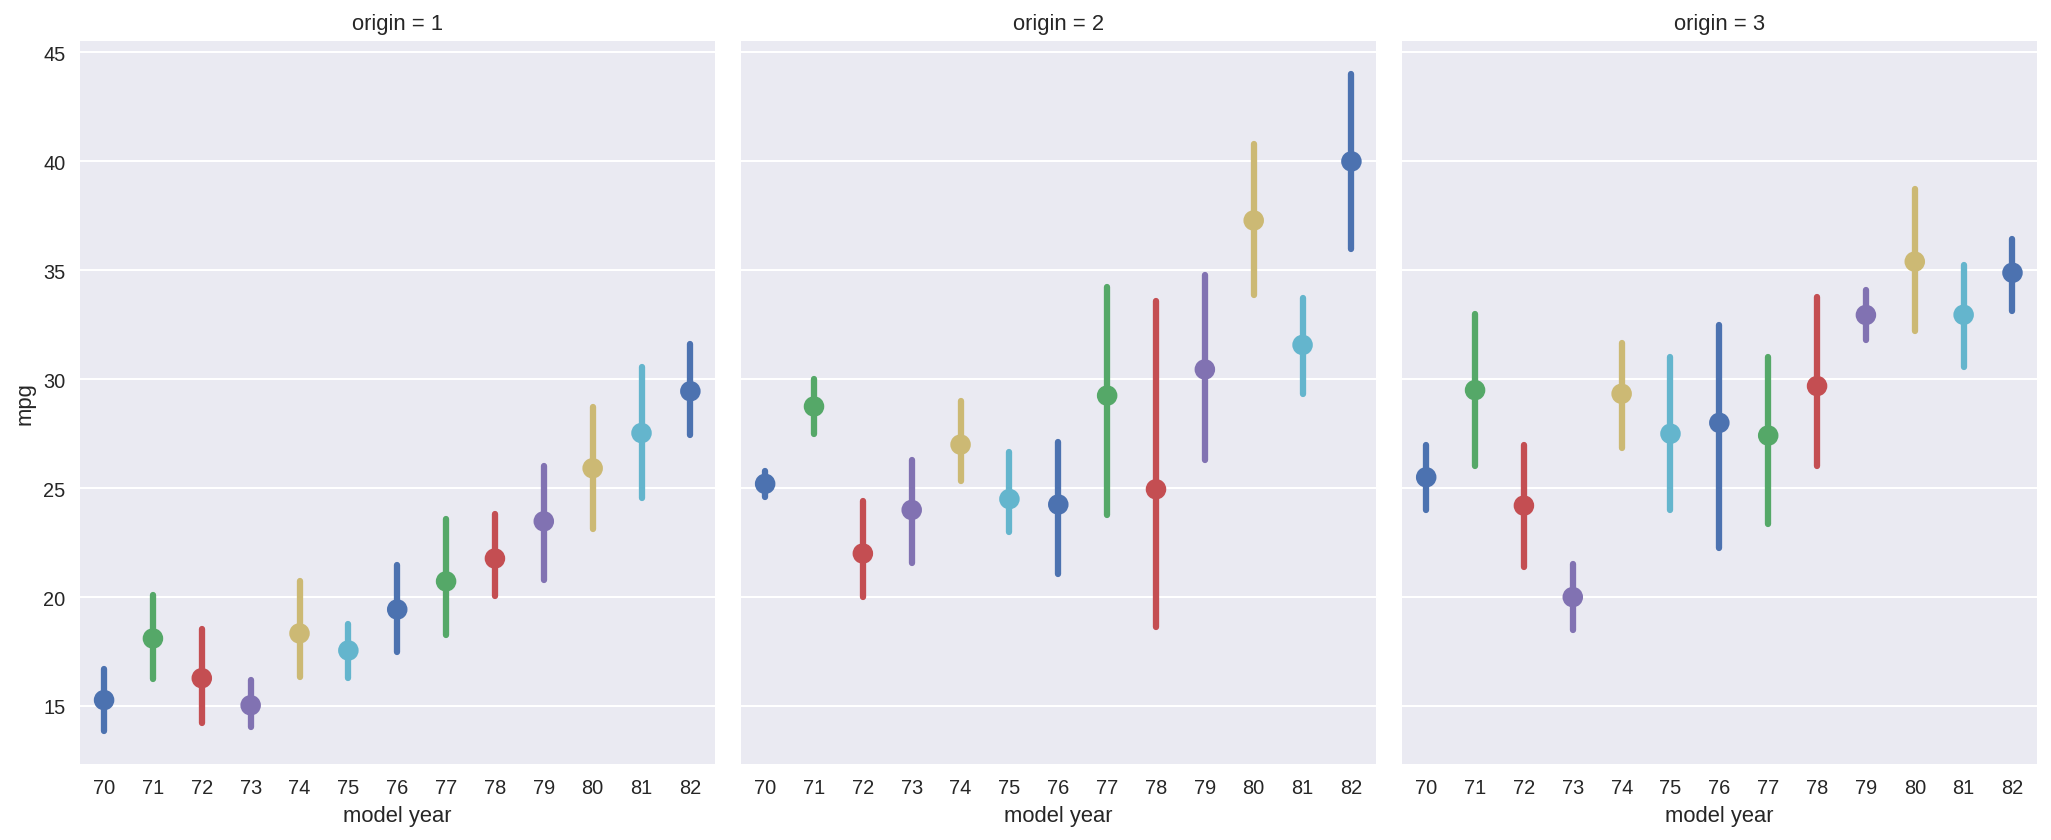

In [55]:
x=sns.factorplot(data=df, x="model year", y="mpg", col="origin",size=6, aspect=.8,palette=current_palette)

## distplot seaborn

In [56]:
sns.distplot?

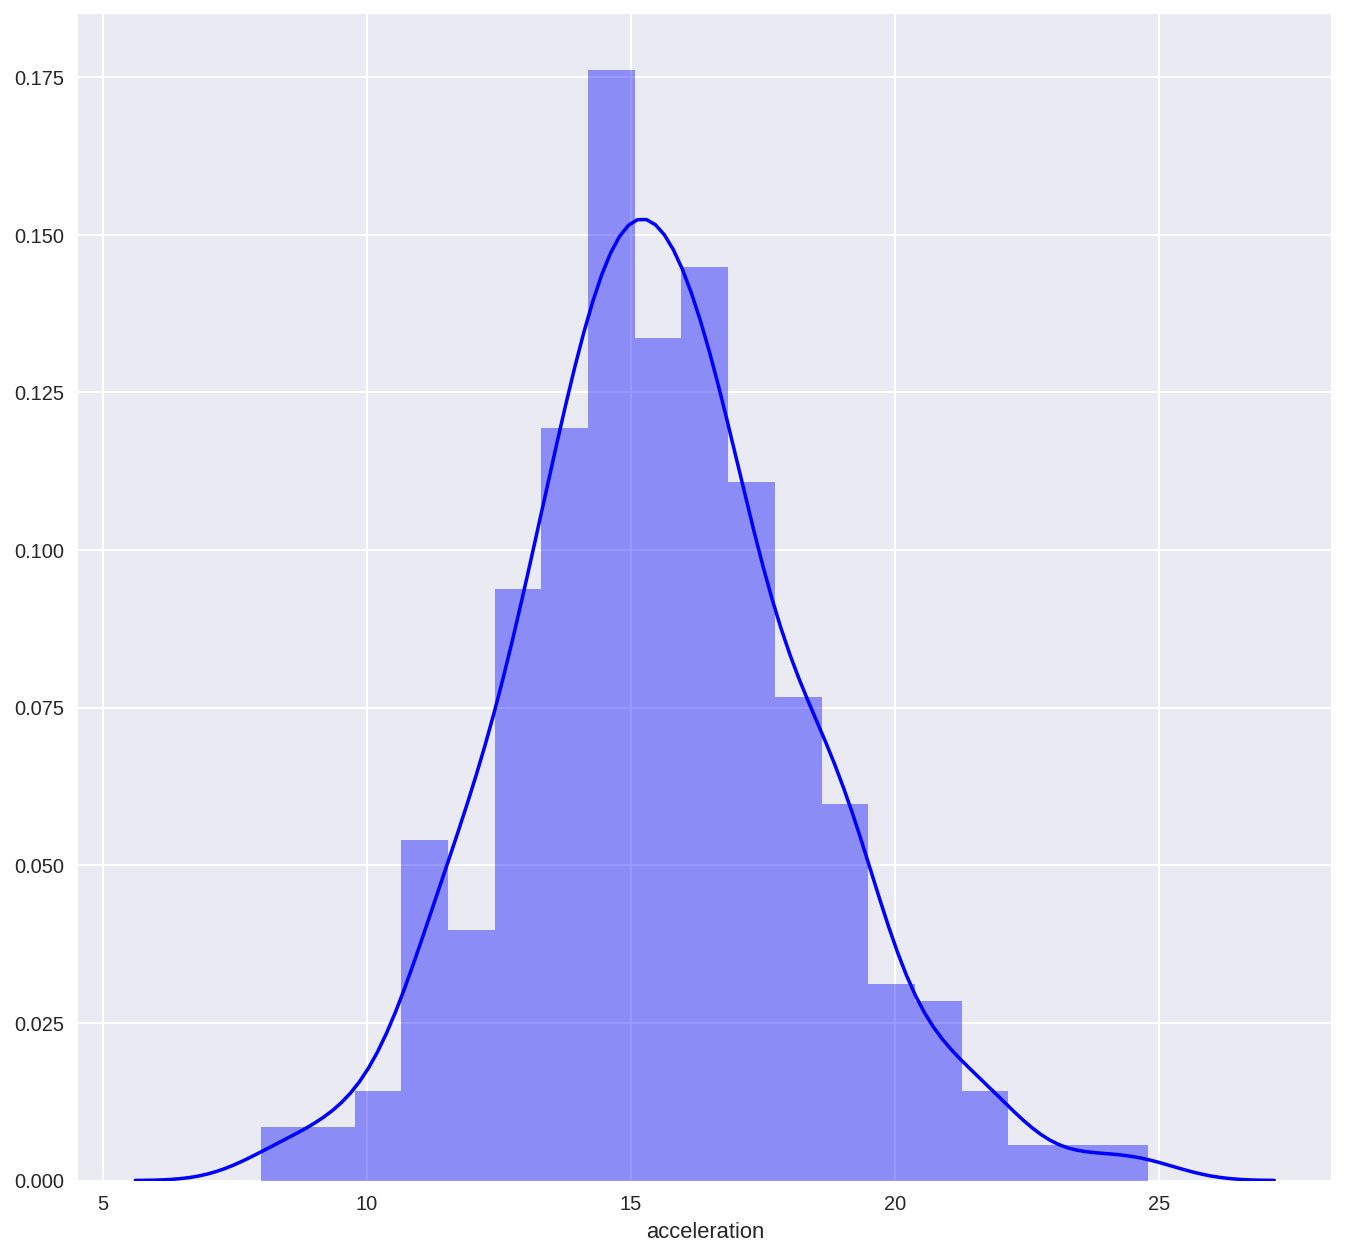

In [99]:
a=sns.distplot(df['acceleration'],color='b',kde=True)

##  FacetGrid

In [58]:
sns.FacetGrid?

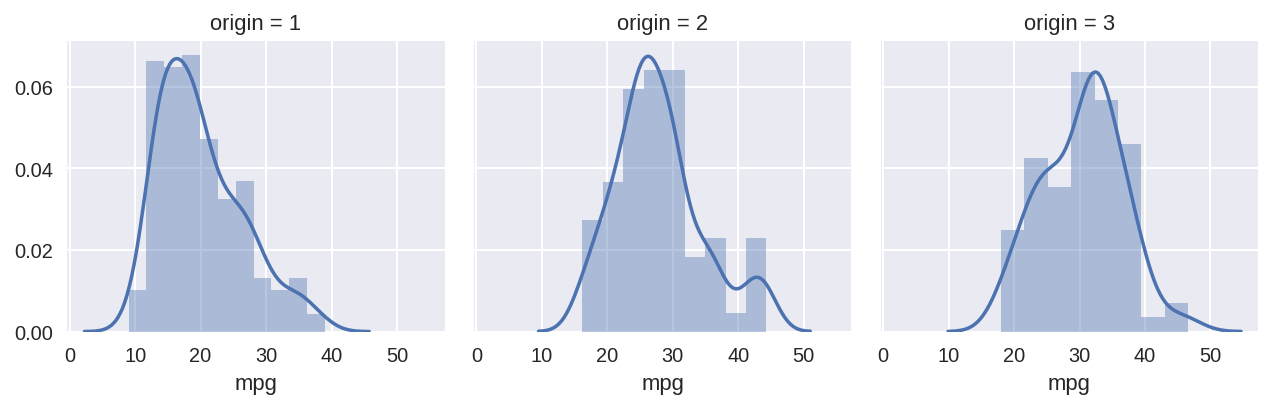

In [100]:
a=sns.FacetGrid(df,col='origin')
b=a.map(sns.distplot, "mpg")

In [ ]:
df['horsepower'].unique()

In [68]:
df['horsepower']=df['horsepower'].replace('?','')
df['horsepower']=df['horsepower'].replace('',np.nan)
df['horsepower']=df['horsepower'].dropna()
df['horsepower']=df['horsepower'].astype(float)

In [70]:
plt.scatter?

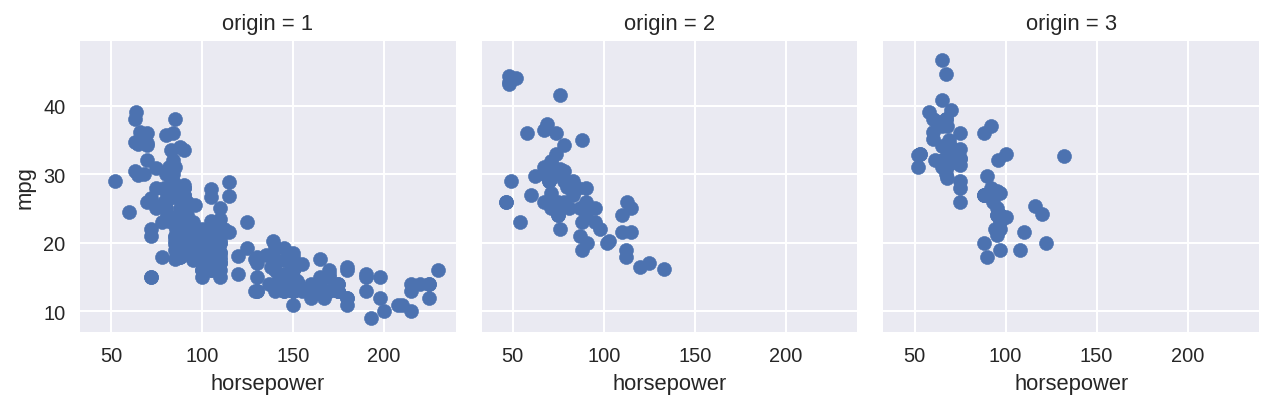

In [101]:
x= sns.FacetGrid(df, col="origin")
x1=x.map(plt.scatter, "horsepower", "mpg")

In [72]:
sns.regplot?

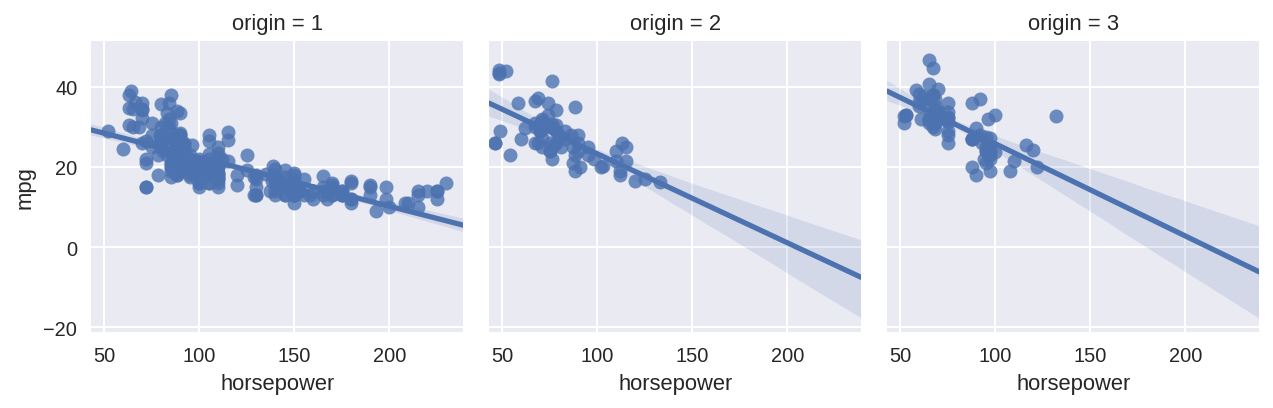

In [102]:
g = sns.FacetGrid(df, col="origin")
g1=g.map(sns.regplot, "horsepower", "mpg")

In [74]:
sns.kdeplot?

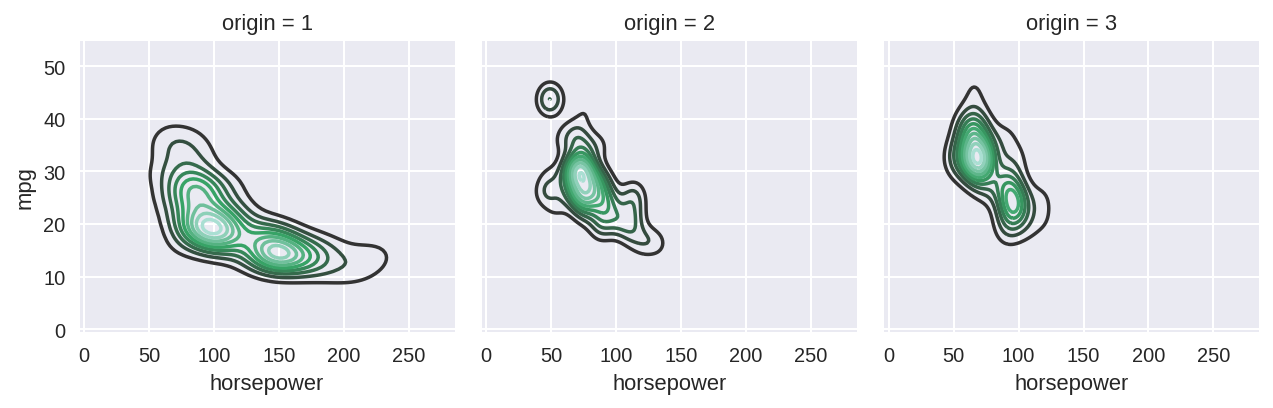

In [103]:
g = sns.FacetGrid(df, col="origin")
g1=g.map(sns.kdeplot, "horsepower", "mpg")

In [91]:
sns.residplot?

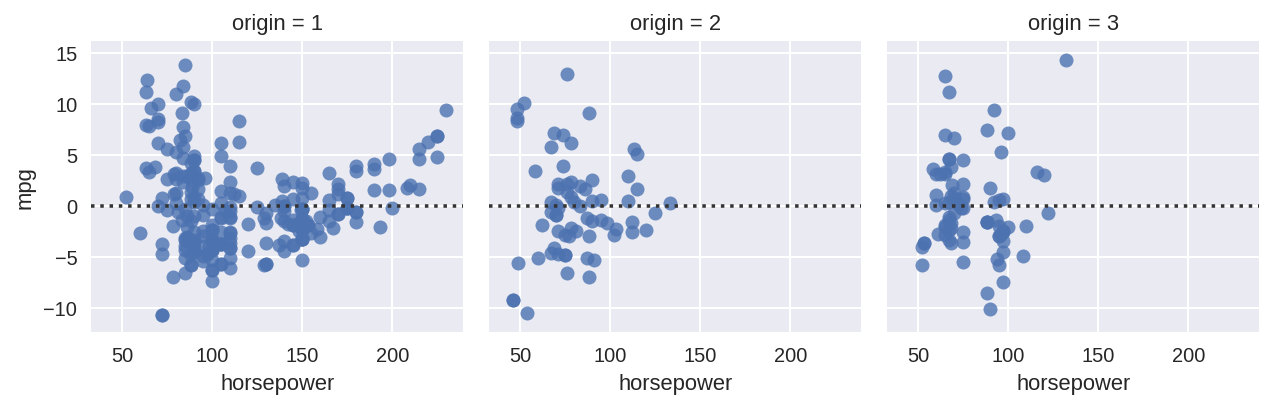

In [104]:
g = sns.FacetGrid(df, col="origin")
g1=g.map(sns.residplot, "horsepower", "mpg")

In [79]:
sns.pairplot?

/home/mhendra/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/mhendra/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


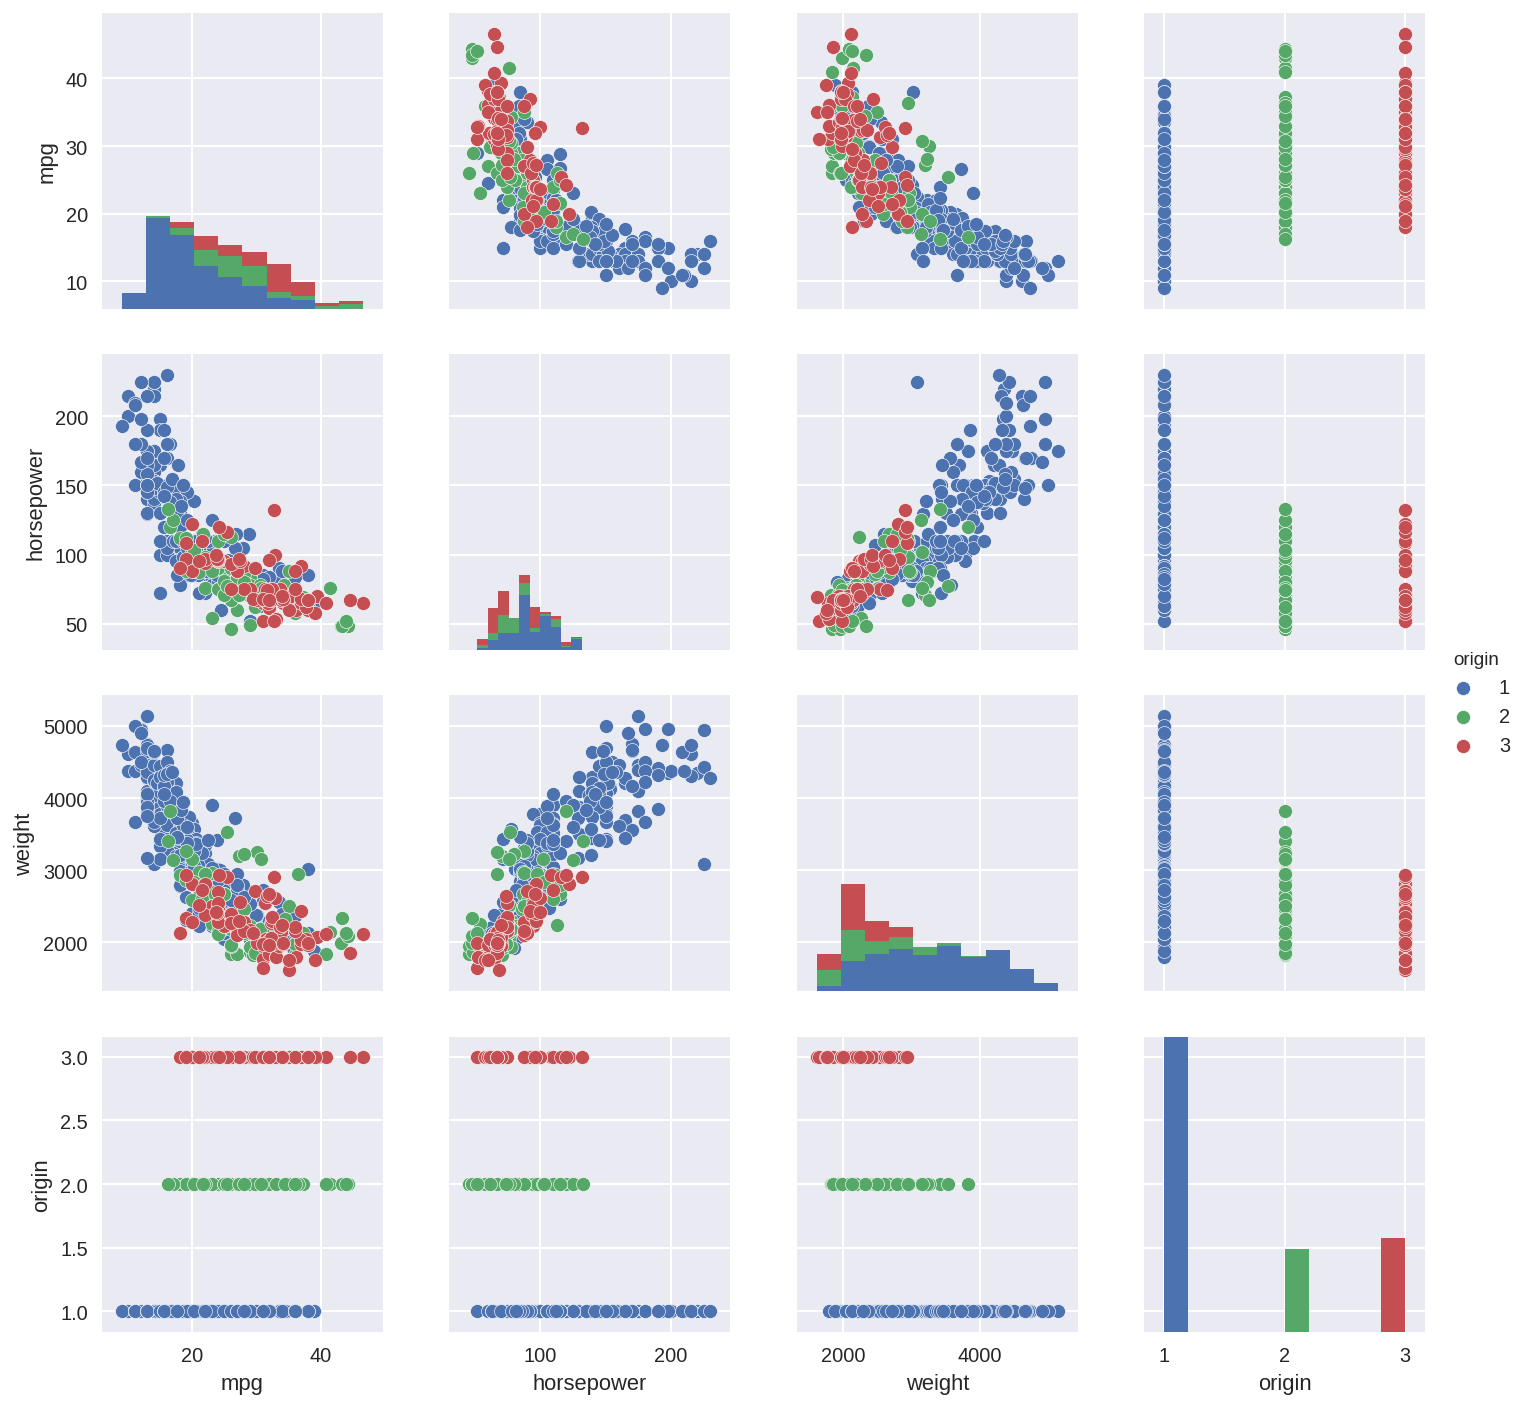

In [83]:
g = sns.pairplot(df[["mpg", "horsepower", "weight", "origin"]], 
                 hue="origin", diag_kind="hist",palette=current_palette)

In [88]:
sns.PairGrid?

/home/mhendra/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/mhendra/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


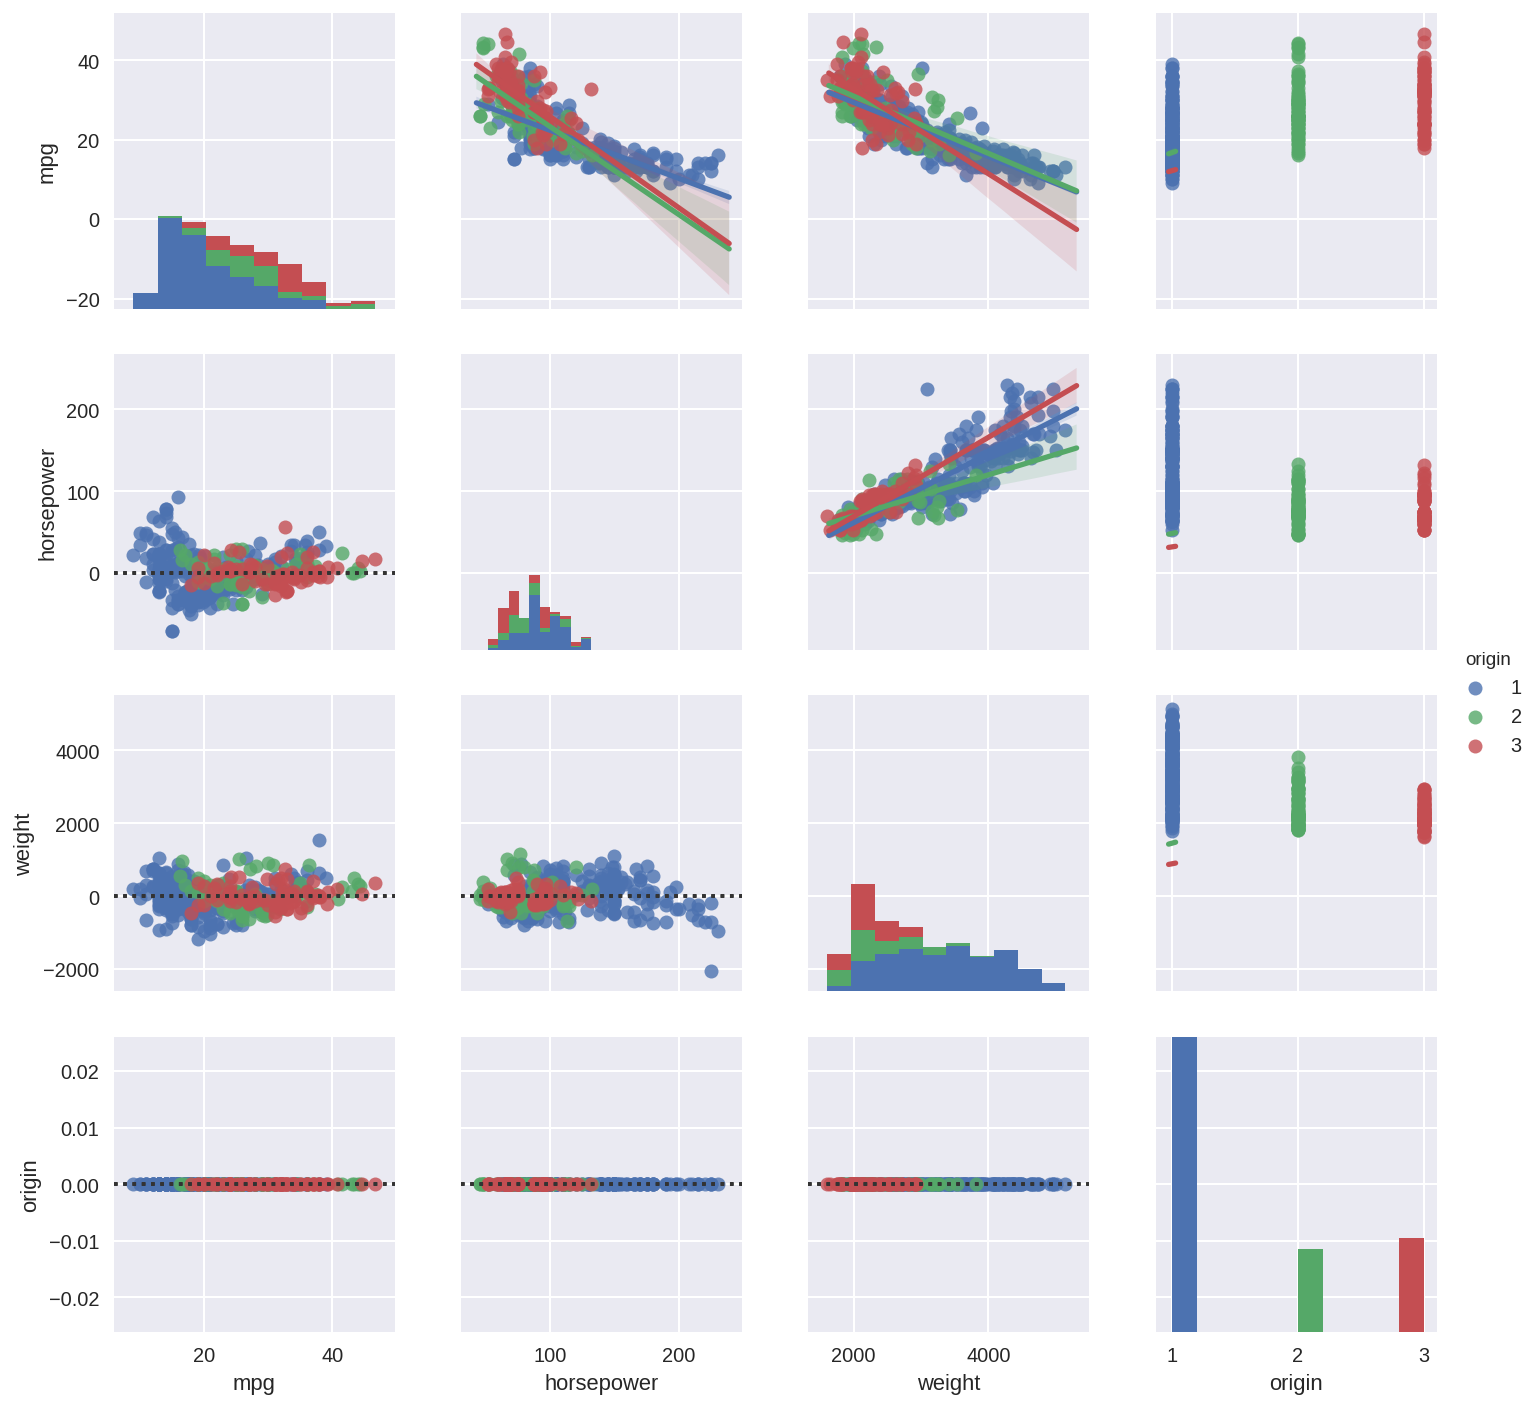

In [105]:
g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]], hue="origin")
a=g.map_upper(sns.regplot)
b=g.map_lower(sns.residplot)
c=g.map_diag(plt.hist)
e=g.add_legend()
d=g.set(alpha=0.5)

In [98]:
sns.jointplot?

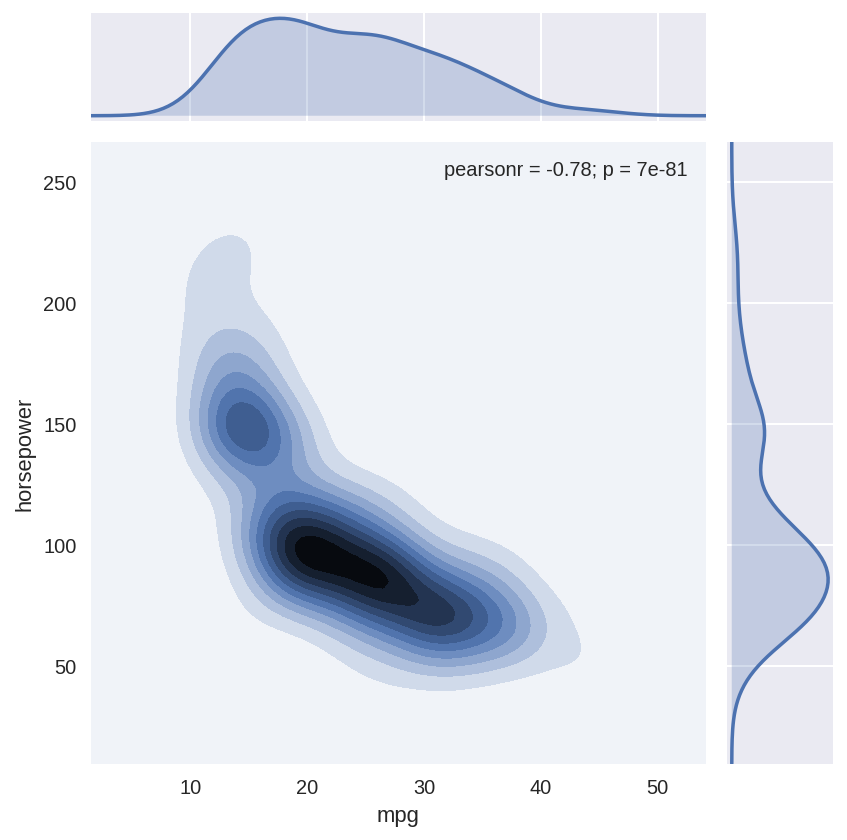

In [106]:
x=sns.jointplot("mpg", "horsepower", data=df, kind='kde')

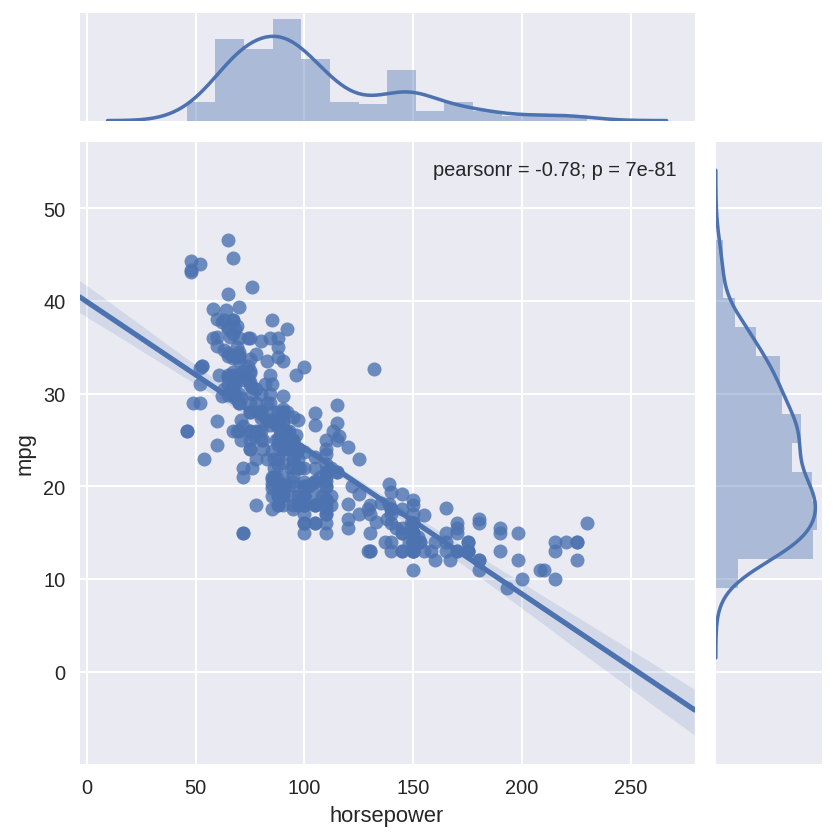

In [107]:
y=sns.jointplot("horsepower", "mpg", data=df, kind="reg")